# Data Science with GitHub Copilot

In this notebook, we'll learn how to leverage GitHub Copilot for Data Science with a dog dataset!

We'll explore the `dog_data.csv` and `dogname_data.csv` datasets and uncover interesting patterns and trends.

Up-to-date datasets can be retrieved from the following sources:
- [Dog Data](https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand_od1001)
- [Dog Name Data](https://data.stadt-zuerich.ch/dataset/sid_stapo_hundenamen_od1002)

Let's get started!

In [15]:
# Import necessary libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix  # For model evaluation

# Install and import the folium library for interactive maps
%pip install folium
import folium  # For creating interactive maps

# Import necessary libraries for text analysis
from sklearn.feature_extraction.text import CountVectorizer  # For text analysis
from sklearn.naive_bayes import MultinomialNB  # For Naive Bayes classifier



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Read the CSV file
df_dogs = pd.read_csv('dog_data.csv')

# Display the first 5 rows of the dataframe
df_dogs.head()


,StichtagDatJahr,DatenstandCd,HalterId,AlterV10Cd,AlterV10Lang,AlterV10Sort,SexCd,SexLang,SexSort,KreisCd,...,RassentypSort,GebDatHundJahr,AlterVHundCd,AlterVHundLang,AlterVHundSort,SexHundCd,SexHundLang,SexHundSort,HundefarbeText,AnzHunde
0,2015,D,126,60,60- bis 69-Jährige,7,1,männlich,1,9,...,1,2011,3,3-Jährige,3,2,weiblich,2,schwarz/braun,1
1,2015,D,574,60,60- bis 69-Jährige,7,2,weiblich,2,2,...,1,2002,12,12-Jährige,12,2,weiblich,2,brindle,1
2,2015,D,695,40,40- bis 49-Jährige,5,1,männlich,1,6,...,2,2012,2,2-Jährige,2,2,weiblich,2,braun,1
3,2015,D,893,60,60- bis 69-Jährige,7,2,weiblich,2,7,...,2,2010,4,4-Jährige,4,2,weiblich,2,schwarz,1
4,2015,D,1177,50,50- bis 59-Jährige,6,1,männlich,1,10,...,1,2011,3,3-Jährige,3,1,männlich,1,schwarz/weiss,1


## Step 1: Data Cleaning

Before we start analyzing the data, let's perform some basic data cleaning steps to ensure the dataset is ready for analysis.

In [24]:
# remove all entries with DatenstandCd="Unbekannt"
df_dogs = df_dogs[df_dogs['DatenstandCd'] != 'Unbekannt']
# remove also all entries with Rasse1Text="Unbekannt"
df_dogs = df_dogs[df_dogs['Rasse1Text'] != 'Unbekannt']
# remove entries if QuarLang contains "Unbekannt"
df_dogs = df_dogs[~df_dogs['QuarLang'].str.contains('Unbekannt', na=False)]
# remove entries that contain "Unbekannt" in column AlterV10Lang
df_dogs = df_dogs[~df_dogs['AlterV10Lang'].str.contains('Unbekannt', na=False)]
# remove entries with dogs that are older htan 25 years
df_dogs = df_dogs[df_dogs['AlterVHundSort'] < 35]

## Step 2: Exploratory Data Analysis

Let's explore the dataset and gain some initial insights into the data.

![solution](images/91dd153f854788e98f2e239ad5e770cec400f4b613669e08fa46a7e24c73ee5e.png)  

In [26]:
# Generate descriptive statistics
print("Descriptive Statistics:")
print(df_dogs.describe())

# Display dataset information
print("\nDataset Information:")
print(df_dogs.info())

Descriptive Statistics:
       StichtagDatJahr       HalterId    AlterV10Cd  AlterV10Sort  \
count     70233.000000   70233.000000  70233.000000  70233.000000   
mean       2019.852690  118975.049863     44.592570      5.459257   
std           2.888845   27914.410025     15.691872      1.569187   
min        2015.000000     126.000000     10.000000      2.000000   
25%        2017.000000   94290.000000     30.000000      4.000000   
50%        2020.000000  121840.000000     40.000000      5.000000   
75%        2022.000000  141304.000000     60.000000      7.000000   
max        2024.000000  166002.000000     90.000000     10.000000   

              SexCd       SexSort       KreisCd     KreisSort        QuarCd  \
count  70233.000000  70233.000000  70233.000000  70233.000000  70233.000000   
mean       1.686401      1.686401      7.392380      7.392380     76.505816   
std        0.463959      0.463959      3.278426      3.278426     33.226696   
min        1.000000      1.000000     

## Visualize the distribution of dog ages

![solution](images/bc617c0539d58bdf7b7a606deb33a736e0072b71ca251f5a828d6c923a8422a9.png)  

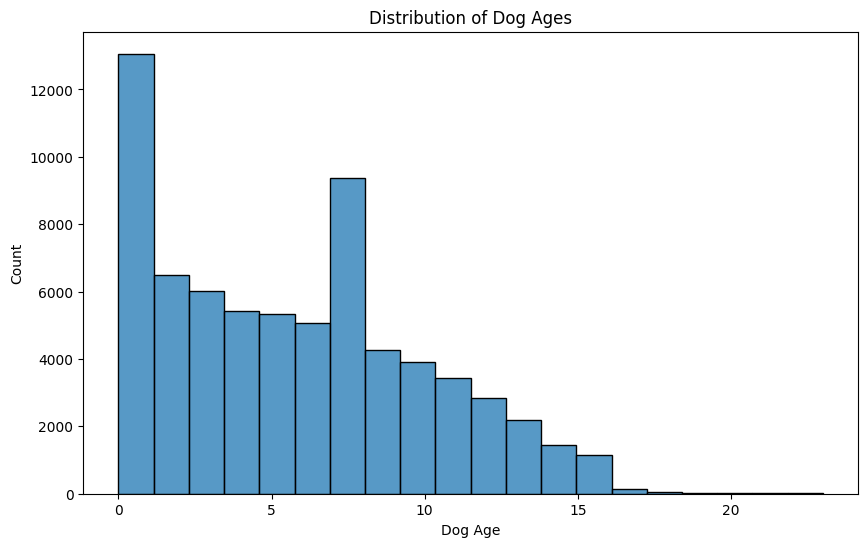

In [31]:
# Visualize the distribution of dog ages

plt.figure(figsize=(10, 6))
sns.histplot(data=df_dogs, x='AlterVHundSort', bins=20)
plt.xlabel('Dog Age')
plt.ylabel('Count')
plt.title('Distribution of Dog Ages')
plt.show()




## Step 3: Correlation Analysis

Let's investigate the relationships between different variables in the dataset using correlation analysis.


![picture 2](images/107345dd6b53d359e455b9d3d290a2554112f8cfc6a60564a7976341fd298939.png)  

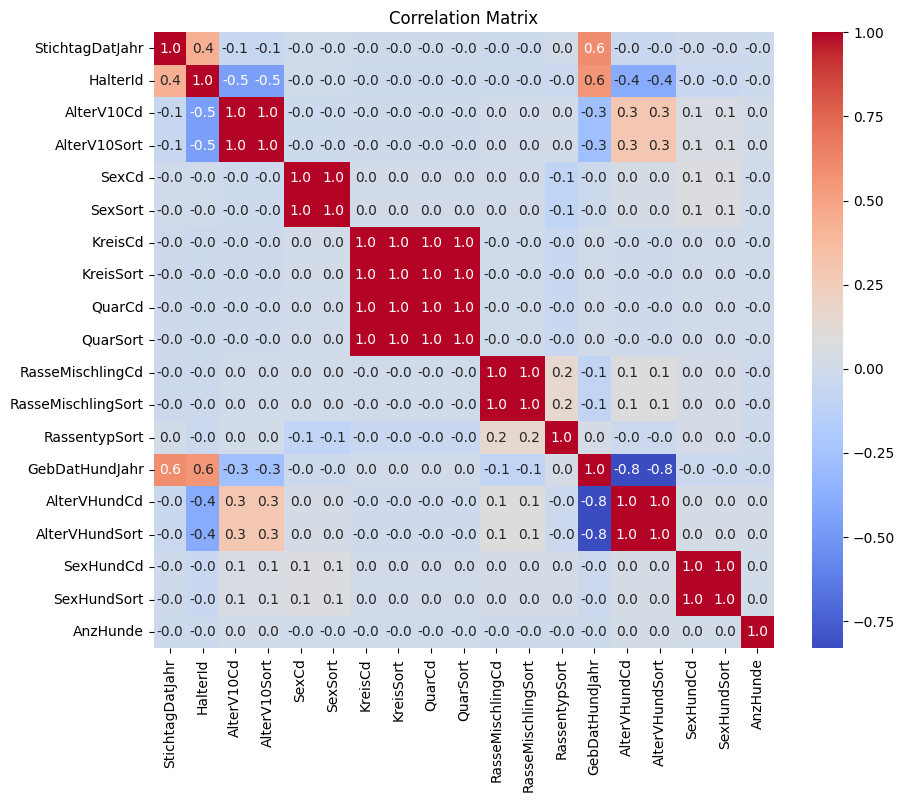

In [35]:
# Exclude non-numeric columns from the correlation matrix calculation
numeric_columns = df_dogs.select_dtypes(include='number').columns
corr_matrix = df_dogs[numeric_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

## Step 4: Breed Popularity Over Time

Let's analyze how the popularity of different dog breeds has changed over time.

![picture 3](images/8ff6c6f3b2eaccdb282746fa93622a3ce468f41cdbf6d5ffc29b55988bea8b24.png)  

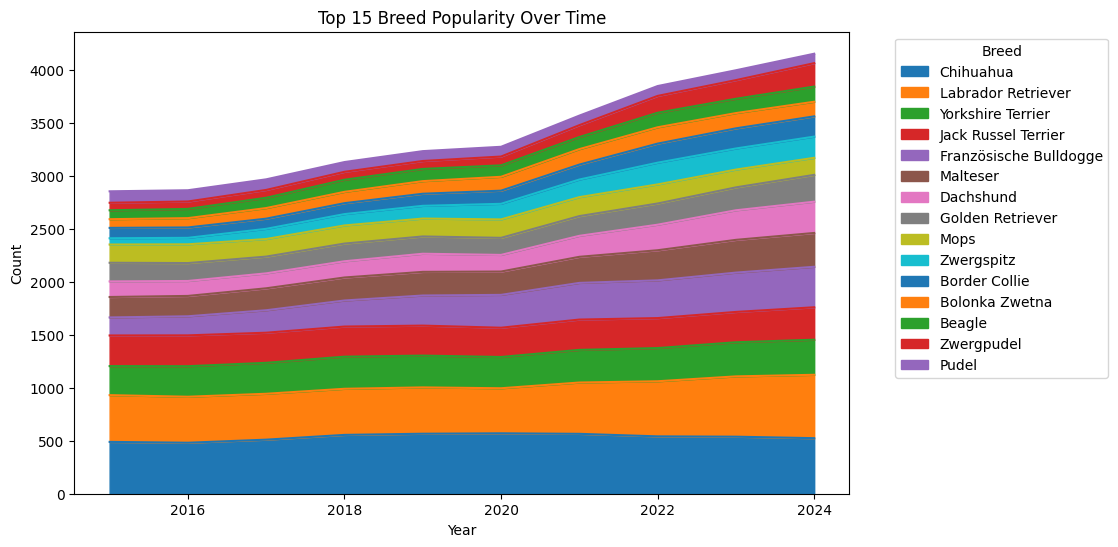

In [37]:
# Group by year and breed, and count the occurrences
breed_popularity = df_dogs.groupby(['StichtagDatJahr', 'Rasse1Text']).size().unstack().fillna(0)

# Calculate the total occurrences for each breed
total_occurrences = breed_popularity.sum(axis=0)

# Select the top N breeds
N = 15
top_breeds = total_occurrences.nlargest(N).index

# Filter the breed_popularity DataFrame to include only the top N breeds
top_breed_popularity = breed_popularity[top_breeds]

# Plot breed popularity over time using an area plot
top_breed_popularity.plot(kind='area', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title(f'Top {N} Breed Popularity Over Time')
plt.legend(title='Breed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Analyze the breed popujlarity by age bracket

![picture 4](images/a0445412130491fcc8ecb392cad25c91e97a3a0aa311a60dcceff4d343c2b723.png)  


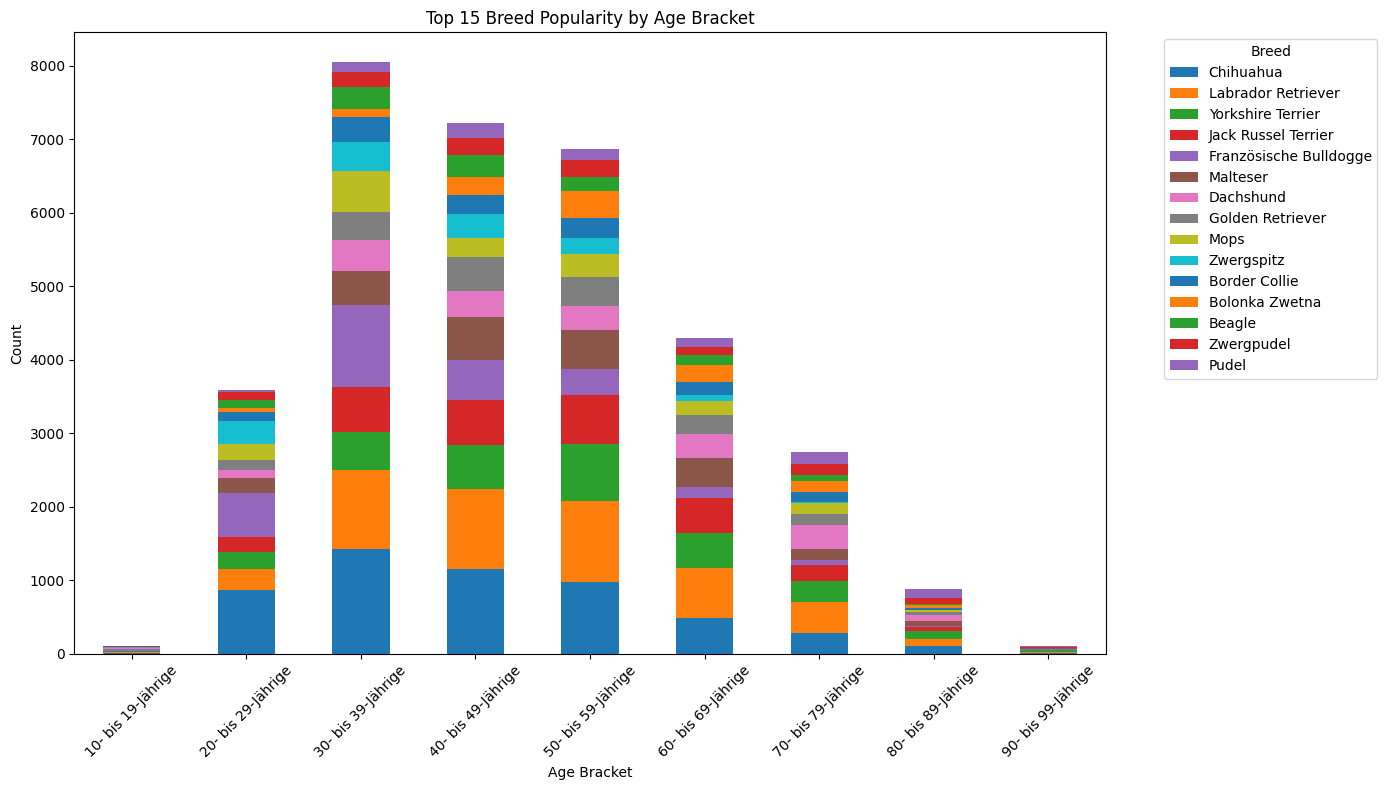

In [39]:
age_breed_popularity = df_dogs.groupby(['AlterV10Lang', 'Rasse1Text']).size().unstack(fill_value=0)

# Select the top N breeds across all age brackets
N = 15
top_breeds_overall = age_breed_popularity.sum().nlargest(N).index

# Filter the DataFrame to include only the top N breeds
top_age_breed_popularity = age_breed_popularity[top_breeds_overall]

# Plot the data using a bar plot
plt.figure(figsize=(14, 8))
top_age_breed_popularity.plot(kind='bar', stacked=True, ax=plt.gca())

# Formatting the plot
plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.title(f'Top {N} Breed Popularity by Age Bracket')
plt.legend(title='Breed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 5: Geographic Analysis

Let's visualize the most popular dog breed in each quartier of Zurich on a map.

In [41]:
import folium
import hashlib

def generate_color(breed_name):
    """Generate a predefined color name from the breed name using a hash function."""
    hash_object = hashlib.md5(breed_name.encode())
    hex_color = hash_object.hexdigest()
    predefined_colors = [
        'darkpurple', 'red', 'gray', 'lightblue', 'beige', 'lightgreen', 
        'white', 'darkred', 'lightgray', 'black', 'green', 'lightred', 
        'darkblue', 'darkgreen', 'pink', 'blue', 'purple', 'cadetblue', 'orange'
    ]
    # Use the hash to pick a color
    color_index = int(hex_color, 16) % len(predefined_colors)
    return predefined_colors[color_index]

quartiers = df_dogs['QuarLang'].unique()

# Create a dictionary to store the coordinates of each quartier
quartier_coordinates = {
    'Altstetten': [47.3886, 8.4839],
    'Leimbach': [47.3406, 8.4934],
    'Oberstrass': [47.3914, 8.5360],
    'Fluntern': [47.3786, 8.5631],
    'Wipkingen': [47.3930, 8.5261],
    'Sihlfeld': [47.3767, 8.5120],
    'Affoltern': [47.4154, 8.5019],
    'Wollishofen': [47.3402, 8.5307],
    'Seefeld': [47.3559, 8.5492],
    'Albisrieden': [47.3739, 8.4908],
    'Witikon': [47.3586, 8.5880],
    'Escher Wyss': [47.3854, 8.5170],
    'Langstrasse': [47.3781, 8.5279],
    'Mühlebach': [47.3610, 8.5506],
    'Hottingen': [47.3686, 8.5569],
    'Seebach': [47.4230, 8.5413],
    'Höngg': [47.4034, 8.4921],
    'Unterstrass': [47.3841, 8.5373],
    'Schwamendingen-Mitte': [47.4049, 8.5704],
    'Werd': [47.3716, 8.5286],
    'Friesenberg': [47.3668, 8.4991],
    'Hirslanden': [47.3656, 8.5706],
    'Saatlen': [47.3994, 8.5754],
    'Hard': [47.3877, 8.5142],
    'Enge': [47.3642, 8.5322],
    'Hirzenbach': [47.3986, 8.5852],
    'Weinegg': [47.3583, 8.5553],
    'Gewerbeschule': [47.3810, 8.5322],
    'Oerlikon': [47.4104, 8.5462],
    'Rathaus': [47.3715, 8.5423],
    'Alt-Wiedikon': [47.3631, 8.5196],
    'Lindenhof': [47.3726, 8.5419],
    'City': [47.3769, 8.5417],
    'Hochschulen': [47.3769, 8.5417],
}

# Find the most popular breed in each quartier
popular_breeds = df_dogs.groupby(['QuarLang', 'Rasse1Text']).size().unstack().idxmax(axis=1)

# Create a map centered on Zurich
zurich_map = folium.Map(location=[47.3769, 8.5417], zoom_start=12)

# Add markers for each quartier with the most popular breed
for quartier in quartiers:
    if quartier in quartier_coordinates:
        coordinates = quartier_coordinates[quartier]
        breed = popular_breeds[quartier]
        
        # Generate a color for the breed
        color = generate_color(breed)
        
        folium.Marker(
            location=coordinates,
            popup=f"{quartier}: {breed}",
            icon=folium.Icon(icon="fa-dog", prefix="fa", color=color)  # Dog icon from FontAwesome
        ).add_to(zurich_map)
    else:
        print(f"No coordinates found for {quartier}")
        raise ValueError(f"No coordinates found for {quartier}")

# Display the map
print("Most Popular Dog Breed per Quartier:")
zurich_map


Most Popular Dog Breed per Quartier:


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Read the CSV files
df_names = pd.read_csv('dogname_data.csv')

print("Dog name data loaded successfully!")

Dog name data loaded successfully!


## Step 7: Dog Name Analysis

Let's analyze the most popular dog names in the dataset.

Top 20 Dog Names:
DogName
Luna      274
Coco      264
Lucky     208
Rocky     198
Max       167
Charly    167
Leo       159
Snoopy    157
Lilly     154
Jack      154
Balu      152
Lucy      152
Sunny     151
Lola      150
Daisy     148
Simba     144
Milo      143
Emma      143
Bella     141
Stella    140
Name: count, dtype: int64


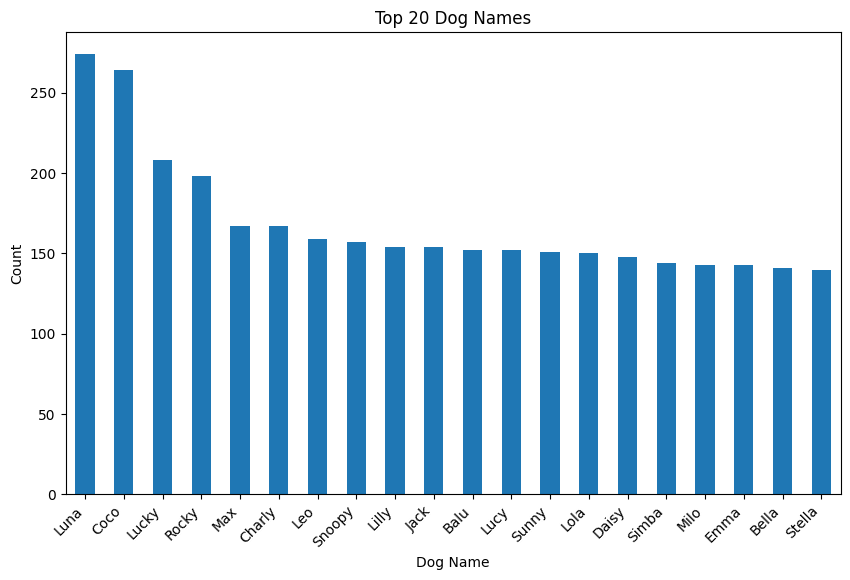

In [ ]:
# Extract the first name from the 'HundenameText' column in df_names
df_names['DogName'] = df_names['HundenameText'].str.split().str[0]

# Find the most common dog names
top_names = df_names['DogName'].value_counts().head(20)
print("Top 20 Dog Names:")
print(top_names)

# Plot the distribution of top dog names
plt.figure(figsize=(10, 6))
top_names.plot(kind='bar')
plt.xlabel('Dog Name')
plt.ylabel('Count')
plt.title('Top 20 Dog Names')
plt.xticks(rotation=45, ha='right')
plt.show()

## Step 8: Dog Age and Breed Size Analysis

Let's explore the relationship between dog age and breed size.

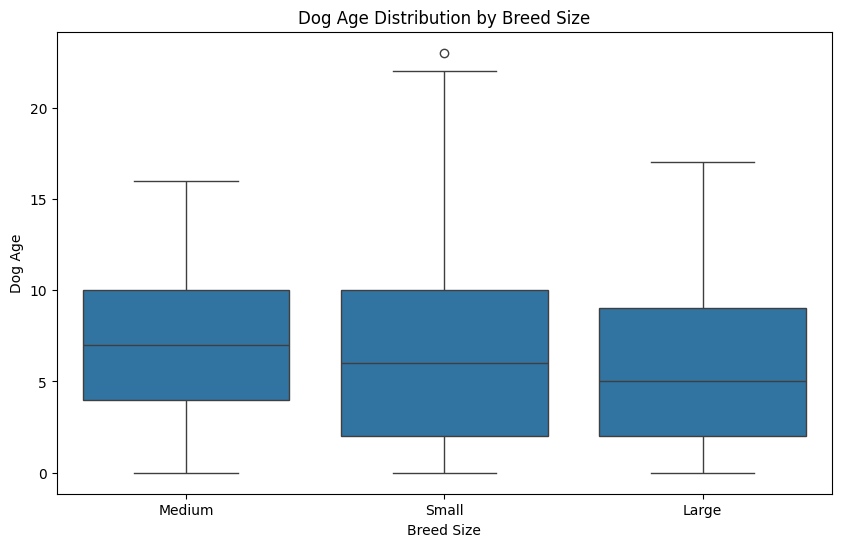

In [ ]:
# Merge breed size information with the dataset
breed_size_map = {
    'Labrador Retriever': 'Large',
    'Shih Tzu': 'Small',
    'Cairn Terrier': 'Small',
    'Welsh Terrier': 'Medium',
    'Mittelschnauzer': 'Medium',
    'Dachshund': 'Small'
}

df_dogs['BreedSize'] = df_dogs['Rasse1Text'].map(breed_size_map)

# Visualize the relationship between dog age and breed size using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BreedSize', y='AlterVHundSort', data=df_dogs)
plt.xlabel('Breed Size')
plt.ylabel('Dog Age')
plt.title('Dog Age Distribution by Breed Size')
plt.show()

## Step 9: Dog Color and Breed Analysis

Let's investigate the relationship between dog color and breed.

<Figure size 1500x800 with 0 Axes>

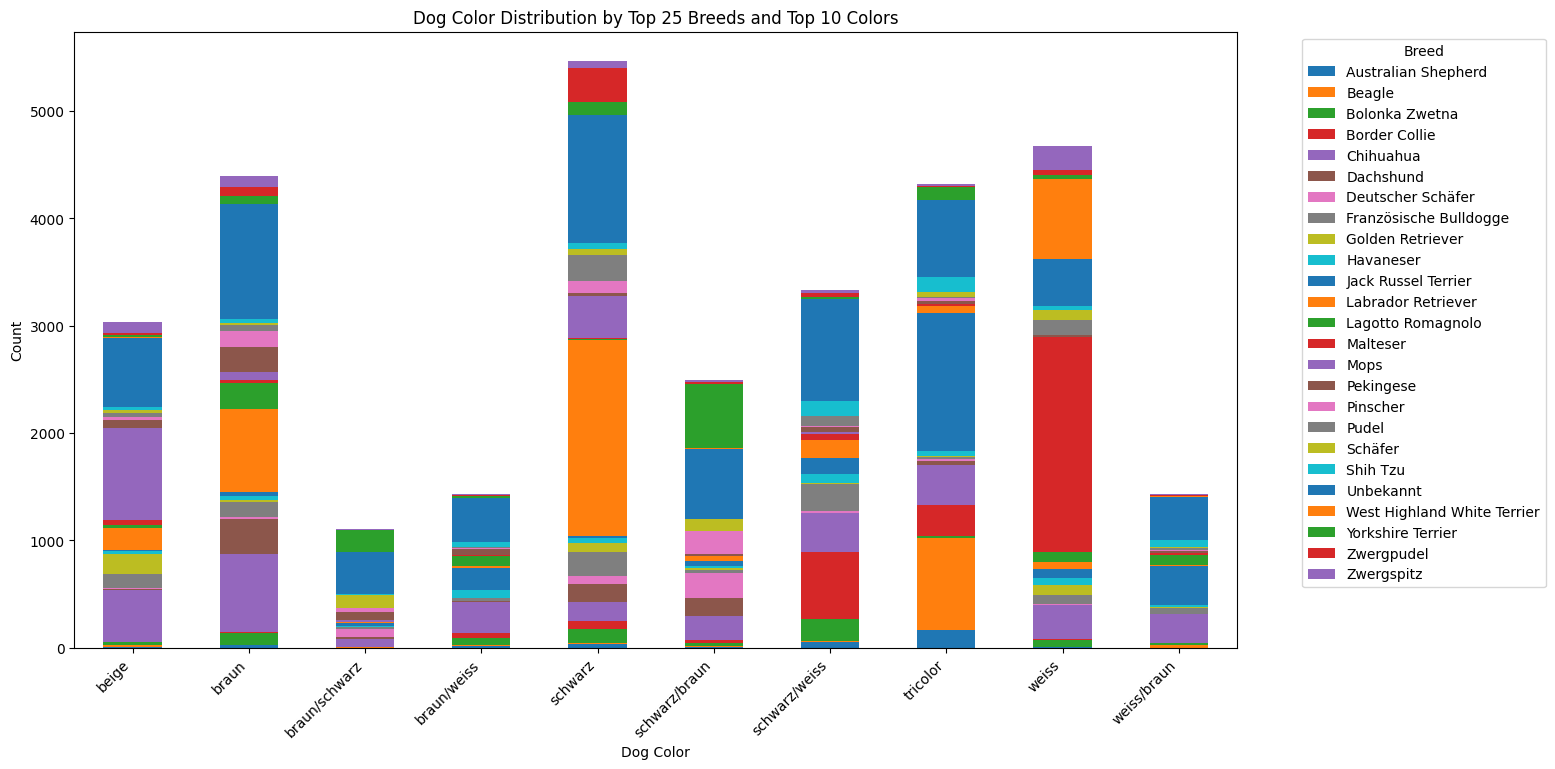

In [ ]:
# Get the top 25 breeds by count
top_25_breeds = df_dogs['Rasse1Text'].value_counts().head(25).index

# Filter the dataframe to include only the top 25 breeds
df_top_breeds = df_dogs[df_dogs['Rasse1Text'].isin(top_25_breeds)]

# Get the top 10 colors by count
top_colors = df_top_breeds['HundefarbeText'].value_counts().head(10).index

# Filter the dataframe to include only the top colors
df_top_breeds_colors = df_top_breeds[df_top_breeds['HundefarbeText'].isin(top_colors)]

# Create a contingency table of dog color and breed
color_breed_table = pd.crosstab(df_top_breeds_colors['HundefarbeText'], df_top_breeds_colors['Rasse1Text'])

# Visualize the relationship using a stacked bar plot
plt.figure(figsize=(15, 8))
color_breed_table.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Dog Color')
plt.ylabel('Count')
plt.title('Dog Color Distribution by Top 25 Breeds and Top 10 Colors')
plt.legend(title='Breed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

## Step 10: Most Popular Dog Name per Year

Let's find out the most popular dog names for each year.

In [ ]:
# Group by year and dog name, and count the occurrences
popular_names_per_year = df_names.groupby(['StichtagDatJahr', 'HundenameText']).size().unstack().idxmax(axis=1)

print("Most Popular Dog Name per Year:")
print(popular_names_per_year)

Most Popular Dog Name per Year:
StichtagDatJahr
2015    Lucky
2016    Lucky
2017    Lucky
2018    Lucky
2019     Coco
2020     Coco
2021     Coco
2022     Coco
2023     Coco
2024     Coco
dtype: object


## Step 11: Longest Dog Names

Let's discover the longest dog names.

In [ ]:
# Calculate the length of each dog name
df_names['NameLength'] = df_names['HundenameText'].str.len()

# Sort the dataframe by name length in descending order and drop duplicates
longest_unique_names = df_names[['HundenameText', 'NameLength']].drop_duplicates().sort_values(by='NameLength', ascending=False)

# Select the top 10 longest unique names
top_25_longest_names = longest_unique_names.head(25)

print("Top 25 Longest Unique Dog Names:")
print(top_25_longest_names[['HundenameText', 'NameLength']])

Top 25 Longest Unique Dog Names:
                        HundenameText  NameLength
0      (Karl) Kaiser Karl vom Edersee          30
41391  Dargon Petipa Otto del Wanhel.          30
16803  Navajo Volcano Spring Barbossa          30
41630  Eila Golden Whirlwind of Lenz.          30
16971  Noodle (Frida) aus d. Farbtopf          30
17065  Orlando v. Burg Schwärtzenberg          30
67594  Khalaya Khione Komainu Neomele          30
59631  Like A Princess Carpathian whi          30
67555  Kayla (Sarmassa Dynamic Brama)          30
3021   Kleopatra  de la F. du Spessar          30
41571  Duke Winston Oliver Wellington          30
41151  Cianluca-Carlos vom Rieskrater          30
2863   Just Girly Things v. Shinbashi          30
67306  Jil Sander von der Fortuna Ran          30
40606  Bonnie (Hajra TappiLargiBulls)          30
67113  Iskko (Continentalspirit Ipee)          30
18603  Twilight Star's All That Matte          30
60111  Maffi Zasko von Hohenwittlinge          30
2910   Kayla (Orc

## Step 12: Dog Gender Prediction

Let's build a model to predict a dog's gender based on its name.

In [ ]:
# Prepare the data
X = df_names['HundenameText']
y = df_names['SexHundLang']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the dog names
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
print("The gender prediction model has been trained.")

# Make predictions on the test set
y_pred = clf.predict(X_test_vec)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


The gender prediction model has been trained.
Model Accuracy: 0.94


In [ ]:
# Test the model with some specific dog names
test_names = ["Bella", "Max", "Charlie", "Jiro", "Rocky", "Lucy", "Milo", "Molly"]
test_names_vec = vectorizer.transform(test_names)
predictions = clf.predict(test_names_vec)

# Display the test results
print("\nTest Results:")
for name, gender in zip(test_names, predictions):
    print(f"Dog Name: {name} - Predicted Gender: {gender}")


Test Results:
Dog Name: Bella - Predicted Gender: weiblich
Dog Name: Max - Predicted Gender: männlich
Dog Name: Charlie - Predicted Gender: männlich
Dog Name: Jiro - Predicted Gender: männlich
Dog Name: Rocky - Predicted Gender: männlich
Dog Name: Lucy - Predicted Gender: weiblich
Dog Name: Milo - Predicted Gender: männlich
Dog Name: Molly - Predicted Gender: weiblich


## Step 13: Dog Name Popularity over Time

Let's analyze the popularity of dog names over time.

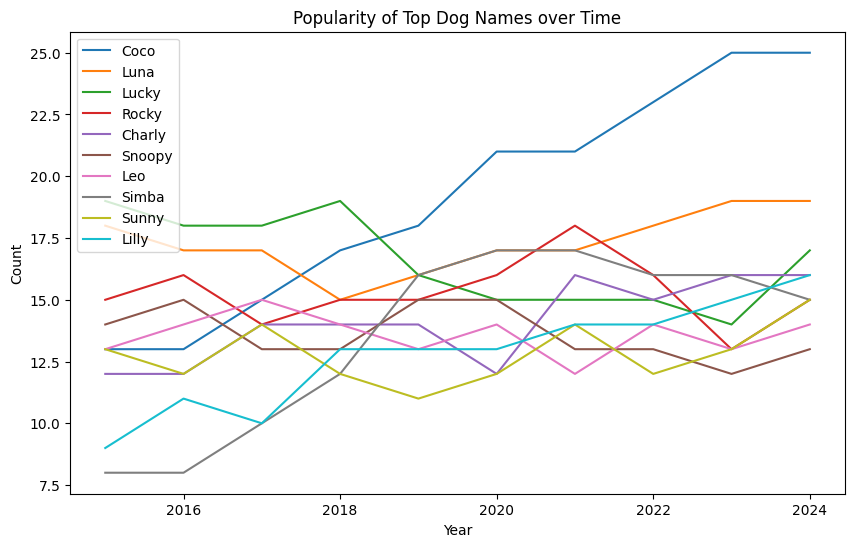

In [ ]:
# Group by dog name and count the occurrences
name_popularity = df_names.groupby('HundenameText').size().reset_index(name='Count')

# Sort the names by popularity
name_popularity = name_popularity.sort_values('Count', ascending=False)

# Select the top 10 most popular names
top_names = name_popularity.head(10)

# Visualize the popularity of top dog names over time
plt.figure(figsize=(10, 6))
for name in top_names['HundenameText']:
    name_data = df_names[df_names['HundenameText'] == name]
    name_counts = name_data.groupby('StichtagDatJahr').size()
    plt.plot(name_counts.index, name_counts.values, label=name)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Popularity of Top Dog Names over Time')
plt.legend()
plt.show()